In [1]:
#lopading up libraries
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import time
import timeit
import copy
import random
import sys
import math

In [3]:
import pickle
import csv
import numpy as np
import pandas as pd
import cv2
import os

ModuleNotFoundError: No module named 'cv2'

In [3]:
from joblib import Parallel,delayed
from timeit import default_timer as timer
import warnings
# Cytoscape
import IPython

In [4]:
#importation of anotation
annotation_file_1 = 'labels_my-project-name_2022-02-04-12-56-14.csv'
file = open(annotation_file_1)
csv_reader = csv.reader(file)
csv_reader

In [5]:
#making iteratiuon along the CSV reader
header = []
header = next(csv_reader)
header

['Chicken', '1304', '817', 'Cam0_Train5_000264.jpg', '2592', '1944']

In [6]:
#making list iut for the annotation from the CV filoe
annotations = []
for row in csv_reader:
    annotations.append(row)

In [7]:
#importing video frames folder
frames_folder = 'C:/Users/iTTaste/MUDASHIR/Image Analysis/Annotation_1/'
frames_names = os.listdir(frames_folder)

In [8]:
os.listdir(frames_folder)

['Cam0_Train5_000264.jpg',
 'Cam0_Train5_001375.jpg',
 'Cam0_Train5_001958.jpg',
 'Cam0_Train5_002827.jpg',
 'Cam0_Train5_002860.jpg',
 'Cam0_Train5_002981.jpg',
 'Cam0_Train5_003212.jpg',
 'Cam0_Train5_003751.jpg',
 'Cam0_Train5_003828.jpg',
 'Cam0_Train5_006336.jpg',
 'Cam0_Train5_007117.jpg',
 'Cam0_Train5_007238.jpg',
 'Cam0_Train5_007623.jpg',
 'Cam0_Train5_009746.jpg',
 'Cam0_Train5_010010.jpg',
 'Cam0_Train5_010912.jpg',
 'Cam0_Train5_011055.jpg',
 'Cam0_Train5_011187.jpg',
 'Cam0_Train5_011484.jpg',
 'Cam0_Train5_011506.jpg',
 'Cam0_Train5_011814.jpg',
 'Cam0_Train5_012056.jpg',
 'Cam0_Train5_012639.jpg',
 'Cam0_Train5_012727.jpg',
 'Cam0_Train5_013431.jpg',
 'Cam0_Train5_014718.jpg',
 'Cam0_Train5_014784.jpg',
 'Cam0_Train5_015092.jpg',
 'Cam0_Train5_015312.jpg',
 'Cam0_Train5_015510.jpg',
 'Cam0_Train5_016104.jpg',
 'Cam0_Train5_016225.jpg',
 'Cam0_Train5_016797.jpg',
 'Cam0_Train5_017512.jpg',
 'Cam0_Train5_017644.jpg',
 'Cam0_Train5_017721.jpg',
 'Cam0_Train5_017809.jpg',
 

In [9]:
RawFrames = []
for frame_nr in range(len(frames_names)):
    #reading in frames using cv2 library
    imported_frame = cv2.imread(frames_folder + frames_names[frame_nr], cv2.IMREAD_GRAYSCALE)

    print("Frame with shape:" + str(imported_frame.shape) + " imported.")
    RawFrames.append(imported_frame)

Frame with shape:(1944, 2592) imported.
Frame with shape:(1944, 2592) imported.
Frame with shape:(1944, 2592) imported.
Frame with shape:(1944, 2592) imported.
Frame with shape:(1944, 2592) imported.
Frame with shape:(1944, 2592) imported.
Frame with shape:(1944, 2592) imported.
Frame with shape:(1944, 2592) imported.
Frame with shape:(1944, 2592) imported.
Frame with shape:(1944, 2592) imported.
Frame with shape:(1944, 2592) imported.
Frame with shape:(1944, 2592) imported.
Frame with shape:(1944, 2592) imported.
Frame with shape:(1944, 2592) imported.
Frame with shape:(1944, 2592) imported.
Frame with shape:(1944, 2592) imported.
Frame with shape:(1944, 2592) imported.
Frame with shape:(1944, 2592) imported.
Frame with shape:(1944, 2592) imported.
Frame with shape:(1944, 2592) imported.
Frame with shape:(1944, 2592) imported.
Frame with shape:(1944, 2592) imported.
Frame with shape:(1944, 2592) imported.
Frame with shape:(1944, 2592) imported.
Frame with shape:(1944, 2592) imported.


In [10]:
# visualising the imported frames 
random_number = random.randint(0,len(RawFrames))
cv2.namedWindow('image', cv2.WINDOW_NORMAL )
cv2.resizeWindow("image", 1600, 900)

image = RawFrames[random_number]

cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [11]:
# Highlight the annotations in the video frames
#image rescalling
# Define the target dimension
target_dim = (640,400)

# extract the unique image names from annotations
image_names = []
for entry in range(len(annotations)):
        current_name = annotations[entry][3]

        if entry == 0:
                image_names.append(current_name)
 #this used to cross check if the last item on the iteration is the same as last image_name list
        if image_names[-1] != current_name:
                image_names.append(current_name)
        else:
                continue


In [19]:
current_name


'Cam0_Train5_026081.jpg'

In [20]:
image_names

['Cam0_Train5_000264.jpg',
 'Cam0_Train5_001375.jpg',
 'Cam0_Train5_001958.jpg',
 'Cam0_Train5_002827.jpg',
 'Cam0_Train5_002860.jpg',
 'Cam0_Train5_002981.jpg',
 'Cam0_Train5_003212.jpg',
 'Cam0_Train5_003751.jpg',
 'Cam0_Train5_003828.jpg',
 'Cam0_Train5_006336.jpg',
 'Cam0_Train5_007117.jpg',
 'Cam0_Train5_007238.jpg',
 'Cam0_Train5_007623.jpg',
 'Cam0_Train5_009746.jpg',
 'Cam0_Train5_010010.jpg',
 'Cam0_Train5_010912.jpg',
 'Cam0_Train5_011055.jpg',
 'Cam0_Train5_011187.jpg',
 'Cam0_Train5_011484.jpg',
 'Cam0_Train5_011506.jpg',
 'Cam0_Train5_011814.jpg',
 'Cam0_Train5_012056.jpg',
 'Cam0_Train5_012639.jpg',
 'Cam0_Train5_012727.jpg',
 'Cam0_Train5_013431.jpg',
 'Cam0_Train5_014718.jpg',
 'Cam0_Train5_014784.jpg',
 'Cam0_Train5_015092.jpg',
 'Cam0_Train5_015312.jpg',
 'Cam0_Train5_015510.jpg',
 'Cam0_Train5_016104.jpg',
 'Cam0_Train5_016225.jpg',
 'Cam0_Train5_016797.jpg',
 'Cam0_Train5_017512.jpg',
 'Cam0_Train5_017644.jpg',
 'Cam0_Train5_017721.jpg',
 'Cam0_Train5_017809.jpg',
 

In [13]:
#creating a dataframe for the imported label 
# Use the names to read in the frame again and highlight the chicken
annotations_df = pd.DataFrame(annotations)


In [29]:
print(len(image_names))
print(len(df_small))
current_frame
df_small


50
97


,0,1,2,3,4,5
4534,Chicken,1757,1502,Cam0_Train5_026081.jpg,2592,1944
4535,Chicken,1690,1429,Cam0_Train5_026081.jpg,2592,1944
4536,Chicken,1503,1322,Cam0_Train5_026081.jpg,2592,1944
4537,Chicken,1107,1315,Cam0_Train5_026081.jpg,2592,1944
4538,Chicken,1491,1717,Cam0_Train5_026081.jpg,2592,1944
...,...,...,...,...,...,...
4626,Chicken,361,1560,Cam0_Train5_026081.jpg,2592,1944
4627,Chicken,269,1585,Cam0_Train5_026081.jpg,2592,1944
4628,Chicken,195,1585,Cam0_Train5_026081.jpg,2592,1944
4629,Chicken,351,1685,Cam0_Train5_026081.jpg,2592,1944


In [14]:
# Store the final frame in framesAnnot
framesAnnot = []
for img_nr in range(len(image_names)):
        print(img_nr)

        # get the first name
        current_name = image_names[img_nr]

        # read the raw frame
        current_frame = cv2.imread(frames_folder + current_name, cv2.IMREAD_GRAYSCALE)

        # rescale the pixel
        current_frame = current_frame / 255 # maximum is 1; minimum is 0

        # what is the scaling factor
        y_scale = current_frame.shape[0] / target_dim[1]
        x_scale = current_frame.shape[1] / target_dim[0]

        # resize it to the target dimension
        current_frame = cv2.resize(current_frame, target_dim)

        # filter the dataframe by the name
        #this collect all the annotation together by a single frame name
        df_small = annotations_df[annotations_df[3].str.contains(current_name)]

        # Select the coordinates for the first chicken in the current frame
        for entry in range(len(df_small)):
                x_coor_orig = int(df_small.iloc[entry, 1])
                y_coor_orig = int(df_small.iloc[entry,2])

                # rescale the coordinates
                x_coor =  int(x_coor_orig / x_scale )
                y_coor =  int(y_coor_orig / y_scale )

                current_frame = cv2.circle(current_frame, (x_coor,y_coor) ,radius=3 ,color=255 ,thickness=cv2.FILLED)

        # store the frame in the list: framesAnnot
        framesAnnot.append(current_frame)

        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


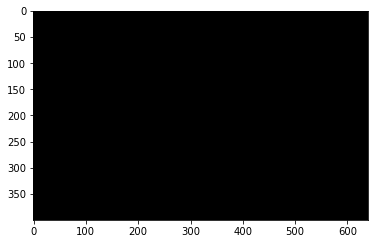

In [46]:
# for every uniquw image in the annotation table, we need a binary image

black_img = np.zeros((target_dim[1], target_dim[0], 1)).astype(int)

for entry in range(len(df_small)):
        x_coor = df_small.iloc[entry,1]
        y_coor = df_small.iloc[entry,2]

        # rescale the coordinates
        x_coor = int(int(x_coor) / x_scale)
        y_coor = int(int(y_coor) / y_scale)

        black_img = cv2.circle(black_img,(x_coor,y_coor),radius=3,color=1,thickness=cv2.FILLED)

plt.imshow(black_img, cmap='gray')





In [55]:
#looping through every tables for my binary images collections
# for every uniquw image in the annotation table, we need a binary image

# Store the final frame in framesAnnot
black_img_frame = np.zeros((target_dim[1], target_dim[0], 1)).astype(int)
black_list = []
for img_nr in range(len(image_names)):
        print(img_nr)

        # get the first name
        current_name = image_names[img_nr]
        # filter the dataframe by the name
        #this collect all the annotation together by a single frame name (current frame)
        df_small = annotations_df[annotations_df[3].str.contains(current_name)]
       

        # Select the coordinates for the first chicken in the current frame
        for entry in range(len(df_small)):
                x_coor_orig = int(df_small.iloc[entry, 1])
                y_coor_orig = int(df_small.iloc[entry,2])

                # rescale the coordinates
                x_coor =  int(x_coor_orig / x_scale )
                y_coor =  int(y_coor_orig / y_scale )
               
                black_img = cv2.circle(black_img_frame,(x_coor,y_coor),radius=3,color=1,thickness=cv2.FILLED)
        # store the frame in the list: framesAnnot
                black_list.append(black_img)




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [49]:
df_small

,0,1,2,3,4,5
4534,Chicken,1757,1502,Cam0_Train5_026081.jpg,2592,1944
4535,Chicken,1690,1429,Cam0_Train5_026081.jpg,2592,1944
4536,Chicken,1503,1322,Cam0_Train5_026081.jpg,2592,1944
4537,Chicken,1107,1315,Cam0_Train5_026081.jpg,2592,1944
4538,Chicken,1491,1717,Cam0_Train5_026081.jpg,2592,1944
...,...,...,...,...,...,...
4626,Chicken,361,1560,Cam0_Train5_026081.jpg,2592,1944
4627,Chicken,269,1585,Cam0_Train5_026081.jpg,2592,1944
4628,Chicken,195,1585,Cam0_Train5_026081.jpg,2592,1944
4629,Chicken,351,1685,Cam0_Train5_026081.jpg,2592,1944


In [50]:
len(black_list)

50

In [ ]:
black_img

In [ ]:
df_small